# Introduction

Here, I will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology to do my analysis. We will do the alanysis  required for modelling. However, we will not deploy a model.
#### Below are the steps of CRISP-DM Process
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deploy

# 1 - Business Understanding

I have been a software developer for about 5 years now. Like all my other peers, I too ponder on things related to my career in this dynamic industry. When I started out five years ago, I always had the question of a "Dream Career Path" in the back of my mind. This dream career included a good salary coupled with a high level of personal satisfaction as well as job satisfaction.

I know now that any career can be a dream career with the right attitude and dedication. However, a scientific approach to answering these questions would help to find the indicators that will point and nudge someone in the right direction. 

I will use the Stack Overflow Developer Survey Data for the years 2018 and 2019 [Stack Overflow Developer Survey](http://https://insights.stackoverflow.com/survey). Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge and will be appropriate for this exercise.

With the above thoughts in mind, I would like to answer the following questions:
* What is the general demographics of developers?
* What are the features diffrentiating high earning developers from low earning developers?
* What factors contribute towards developer satisfaction?

# 2 - Data Understanding
There are two types of files for each year. The schema file and the result file. Lets import them for the years 2017, 2018 and 2019.

In [1]:
#https://medium.com/@venkataramanagorle/de-cluttering-the-software-developer-career-67ea76d5eff5?sk=d6a26effc298a55102d67d506141fd07
import numpy as np
import pandas as pd
survey_results_public_2018 = pd.read_csv("./data/survey_results_public_2018.csv")
survey_results_schema_2018 = pd.read_csv("./data/survey_results_schema_2018.csv")
survey_results_public_2019 = pd.read_csv("./data/survey_results_public_2019.csv")
survey_results_schema_2019 = pd.read_csv("./data/survey_results_schema_2019.csv")

C:\Users\Venkat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lets check the features in schema files

In [2]:
schema_features_2018 = survey_results_schema_2018['Column']
schema_features_2019 = survey_results_schema_2019['Column']

In [3]:
str(list(schema_features_2018))

"['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'Communication

In [4]:
str(list(schema_features_2019))

"['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVis

There seem to be a lot of features available to us. However, we will need only few of them to answer our questions.
Lets look at the feature descriptions to make an educated guess of the features we will choose for our analysis.

In [5]:
list(survey_results_schema_2018[survey_results_schema_2018.columns[1]])

['Randomized respondent ID number (not in order of survey response time)',
 'Do you code as a hobby?',
 'Do you contribute to open source projects?',
 'In which country do you currently reside?',
 'Are you currently enrolled in a formal, degree-granting college or university program?',
 'Which of the following best describes your current employment status?',
 'Which of the following best describes the highest level of formal education that you’ve completed?',
 "You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')",
 'Approximately how many people are employed by the company or organization you work for?',
 'Which of the following describe you? Please select all that apply.',
 'Including any education, for how many years have you been coding?',
 'For how many years have you coded professionally (as a part of your work)?',
 'How satisfied are you with your current job? If you work more than one job

In [6]:
list(survey_results_schema_2019[survey_results_schema_2019.columns[1]])

['Randomized respondent ID number (not in order of survey response time)',
 'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."',
 'Do you code as a hobby?',
 'How often do you contribute to open source?',
 'How do you feel about the quality of open source software (OSS)?',
 'Which of the following best describes your current employment status?',
 'In which country do you currently reside?',
 'Are you currently enrolled in a formal, degree-granting college or university program?',
 'Which of the following best describes the highest level of formal education that you’ve completed?',
 'What was your main or most important field of study?',
 'Which of the following types of non-degree education have you used or participated in? Please select all that apply.',
 'Approximately how many people are employed by the company or organization you work for?',
 'Which of the following describe you? Please select all that apply.',
 'Includ

After viewing the above descriptions, we can see that there are differences in features for surveys for diffrent years. But some features are similar across both the surveys. I have decided on the following 15 common features from both years that will help me in my analysis

* 2018 - Country, FormalEducation, UndergradMajor, CompanySize, DevType, YearsCoding, HoursComputer, DatabaseWorkedWith, PlatformWorkedWith, FrameworkWorkedWith, LanguageWorkedWith, Age, Gender, RaceEthnicity, CareerSatisfaction, JobSatisfaction, ConvertedSalary

* 2019 - Country, EdLevel, UndergradMajor, OrgSize, DevType, YearsCode, DatabaseWorkedWith, PlatformWorkedWith, WebFrameWorkedWith, LanguageWorkedWith, Age, Gender, Ethnicity, CareerSat, JobSat, ConvertedComp

So lets build a common dataframe for the above common features

# 3 - Data Preparation

In [7]:
choosen_features_final = ['Country', 'EducationLevel', 'Major', 'OrganisationSize', 'DeveloperType', 'Experience', 'DatabaseExp',
                          'PlatformExp', 'LanguageExp', 'Age', 'Gender', 'Race', 'CareerSatisfaction', 
                          'JobSatisfaction', 'Salary']

choosen_features_2018 = ['Country', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'DatabaseWorkedWith', 
                         'PlatformWorkedWith', 'LanguageWorkedWith', 'Age', 'Gender',
                         'RaceEthnicity', 'CareerSatisfaction', 'JobSatisfaction', 'ConvertedSalary']

choosen_features_2019 = ['Country', 'EdLevel', 'UndergradMajor', 'OrgSize', 'DevType', 'YearsCode', 'DatabaseWorkedWith', 
                         'PlatformWorkedWith', 'LanguageWorkedWith', 'Age', 'Gender', 'Ethnicity', 'CareerSat', 
                         'JobSat', 'ConvertedComp']


In [8]:
combined_survey_df_main = pd.DataFrame()
for i in range(0, len(choosen_features_final)):
    combined_survey_df_main[choosen_features_final[i]] = pd.concat([survey_results_public_2018[choosen_features_2018[i]], survey_results_public_2019[choosen_features_2019[i]]], ignore_index=True)
combined_survey_df = combined_survey_df_main.copy()

In [9]:
combined_survey_df.head()

,Country,EducationLevel,Major,OrganisationSize,DeveloperType,Experience,DatabaseExp,PlatformExp,LanguageExp,Age,Gender,Race,CareerSatisfaction,JobSatisfaction,Salary
0,Kenya,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,JavaScript;Python;HTML;CSS,25 - 34 years old,Male,Black or of African descent,Extremely satisfied,Extremely satisfied,NaN
1,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Redis;PostgreSQL;Memcached,Linux,JavaScript;Python;Bash/Shell,35 - 44 years old,Male,White or of European descent,Neither satisfied nor dissatisfied,Moderately dissatisfied,70841.0
2,United States,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,NaN,NaN,NaN,NaN,NaN,NaN,Moderately satisfied,Moderately satisfied,NaN
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,35 - 44 years old,Male,White or of European descent,Slightly dissatisfied,Neither satisfied nor dissatisfied,NaN
4,South Africa,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,SQL Server;PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,C;C++;Java;Matlab;R;SQL;Bash/Shell,18 - 24 years old,Male,White or of European descent,Moderately satisfied,Slightly satisfied,21426.0


In [10]:
combined_survey_df.shape

(187738, 15)

Experience, Age and Salary are numeric features. The other are categorical features.
Lets go throuh all the features one by one and clean the data.

#### Country

In [11]:
combined_survey_df.Country.isna().sum()

544

In [12]:
combined_survey_df.Country.fillna('Others', inplace=True)

In [13]:
combined_survey_df.Country.value_counts().head(10)

United States         41258
India                 22782
Germany               12325
United Kingdom        11958
Canada                 6788
France                 4963
Russian Federation     4563
Brazil                 4453
Poland                 4044
Australia              3921
Name: Country, dtype: int64

Lets mark all countries with less than 500 developers as Others

In [14]:
countries_with_less_than_500_developers = list(combined_survey_df.Country.value_counts()[combined_survey_df.Country.value_counts().values < 500].index)
countries_with_less_than_500_developers

['Slovakia',
 'Chile',
 'Kenya',
 'Thailand',
 'Hong Kong (S.A.R.)',
 'Taiwan',
 'Estonia',
 'Morocco',
 'United Arab Emirates',
 'South Korea',
 'Tunisia',
 'Latvia',
 'Algeria',
 'Peru',
 'Bosnia and Herzegovina',
 'Saudi Arabia',
 'Lebanon',
 'Other Country (Not Listed Above)',
 'Uruguay',
 'Dominican Republic',
 'Venezuela, Bolivarian Republic of...',
 'Armenia',
 'Albania',
 'Costa Rica',
 'Kazakhstan',
 'Ghana',
 'Georgia',
 'Jordan',
 'Ecuador',
 'Uganda',
 'Malta',
 'Azerbaijan',
 'Luxembourg',
 'Republic of Moldova',
 'Guatemala',
 'Cyprus',
 'El Salvador',
 'Ethiopia',
 'The former Yugoslav Republic of Macedonia',
 'Afghanistan',
 'Myanmar',
 'Paraguay',
 'Republic of Korea',
 'Cuba',
 'Uzbekistan',
 'Iceland',
 'Cambodia',
 'Cameroon',
 'Syrian Arab Republic',
 'Iraq',
 'United Republic of Tanzania',
 'Bolivia',
 'Zimbabwe',
 'Sudan',
 'Panama',
 'Mauritius',
 'Nicaragua',
 'Honduras',
 'Jamaica',
 'Kuwait',
 'Kyrgyzstan',
 "Côte d'Ivoire",
 'Trinidad and Tobago',
 'Mongolia

In [15]:
combined_survey_df.Country = combined_survey_df.Country.apply(lambda country: 'Others' if country in countries_with_less_than_500_developers else country)

In [16]:
combined_survey_df.Country.value_counts().head(10)

United States         41258
India                 22782
Others                12373
Germany               12325
United Kingdom        11958
Canada                 6788
France                 4963
Russian Federation     4563
Brazil                 4453
Poland                 4044
Name: Country, dtype: int64

#### EducationLevel

In [17]:
combined_survey_df.EducationLevel.isna().sum()

6645

In [18]:
combined_survey_df.EducationLevel.value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              82793
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           40965
Some college/university study without earning a degree                                22212
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    17593
Associate degree                                                                       5908
Other doctoral degree (Ph.D, Ed.D., etc.)                                              4646
Primary/elementary school                                                              3078
Professional degree (JD, MD, etc.)                                                     2645
I never completed any formal education                                                 1253
Name: EducationLevel, dtype: int64

In [19]:
combined_survey_df.EducationLevel.isna().sum()

6645

In [20]:
combined_survey_df.EducationLevel.fillna('Unknown', inplace=True)

In [21]:
edu_level_dict = {'Bachelor’s degree (BA, BS, B.Eng., etc.)':'Bachelors',
                  'Master’s degree (MA, MS, M.Eng., MBA, etc.)':'Masters',
                  'Some college/university study without earning a degree':'Col. w/o Degree',
                  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'High School',
                  'Primary/elementary school':'Elem. School',
                  'Associate degree':'Degree',
                  'Other doctoral degree (Ph.D, Ed.D., etc.)':'Doctoral',
                  'Professional degree (JD, MD, etc.)':'Doctoral',
                  'I never completed any formal education':'Not Completed',
                  'Unknown':'Unknown'}
combined_survey_df.EducationLevel = combined_survey_df.EducationLevel.apply(lambda edu: edu_level_dict[edu])

In [22]:
combined_survey_df.EducationLevel.value_counts().head(10)

Bachelors          82793
Masters            40965
Col. w/o Degree    22212
High School        17593
Doctoral            7291
Unknown             6645
Degree              5908
Elem. School        3078
Not Completed       1253
Name: EducationLevel, dtype: int64

#### Major

In [23]:
combined_survey_df.Major.isna().sum()

33088

In [24]:
combined_survey_df.Major.fillna('Unknown', inplace=True)

In [25]:
combined_survey_df.Major.value_counts()

Computer science, computer engineering, or software engineering          97550
Unknown                                                                  33088
Another engineering discipline (ex. civil, electrical, mechanical)       13167
Information systems, information technology, or system administration    11760
A natural science (ex. biology, chemistry, physics)                       6282
Web development or web design                                             5840
Mathematics or statistics                                                 5793
A business discipline (ex. accounting, finance, marketing)                3762
A humanities discipline (ex. literature, history, philosophy)             3161
A social science (ex. anthropology, psychology, political science)        2729
Fine arts or performing arts (ex. graphic design, music, studio art)      2368
I never declared a major                                                  1669
A health science (ex. nursing, pharmacy, radiology) 

In [26]:
major_short_dict = {
    'Computer science, computer engineering, or software engineering':'Comp. Sci',
    'Unknown':'Unknown',
    'Another engineering discipline (ex. civil, electrical, mechanical)':'Engg. Others',
    'Information systems, information technology, or system administration':'Info. Tech',
    'A natural science (ex. biology, chemistry, physics)':'Basic. Sci',
    'Web development or web design':'Web. dsgn',
    'Mathematics or statistics':'Math Stats',
    'A business discipline (ex. accounting, finance, marketing)':'Buss. Adm',
    'A social science (ex. anthropology, psychology, political science)':'Social. Sci',
    'A humanities discipline (ex. literature, history, philosophy)':'Humanities',
    'Fine arts or performing arts (ex. graphic design, music, studio art)':'Arts',
    'I never declared a major':'Unknown',
    'A health science (ex. nursing, pharmacy, radiology)':'Health. Sci'
}
combined_survey_df.Major = combined_survey_df.Major.apply(lambda major: major_short_dict[major])

In [27]:
combined_survey_df.Major.value_counts()

Comp. Sci       97550
Unknown         34757
Engg. Others    13167
Info. Tech      11760
Basic. Sci       6282
Web. dsgn        5840
Math Stats       5793
Buss. Adm        3762
Humanities       3161
Social. Sci      2729
Arts             2368
Health. Sci       569
Name: Major, dtype: int64

#### OrganisationSize

In [28]:
combined_survey_df.OrganisationSize.isna().sum()

44416

In [29]:
combined_survey_df.OrganisationSize.fillna('Unknown', inplace=True)

In [30]:
combined_survey_df.OrganisationSize.value_counts()

Unknown                                               44416
20 to 99 employees                                    32195
100 to 499 employees                                  26845
10,000 or more employees                              19904
1,000 to 4,999 employees                              15154
10 to 19 employees                                    14775
500 to 999 employees                                   9205
Fewer than 10 employees                                7479
2-9 employees                                          7393
5,000 to 9,999 employees                               6002
Just me - I am a freelancer, sole proprietor, etc.     4370
Name: OrganisationSize, dtype: int64

In [31]:
org_dict = {
    'Unknown':'Unknown',
    '20 to 99 employees':'20-99',
    '100 to 499 employees':'100-499',
    '10,000 or more employees':'>= 10000',
    '1,000 to 4,999 employees':'1000-4999',
    '10 to 19 employees':'10-19',
    '500 to 999 employees':'500-999',
    'Fewer than 10 employees':'< 10',
    '2-9 employees':'2-9',
    '5,000 to 9,999 employees':'5000-9999',
    'Just me - I am a freelancer, sole proprietor, etc.':'Freelancer'
}
combined_survey_df.OrganisationSize = combined_survey_df.OrganisationSize.apply(lambda org: org_dict[org])

In [32]:
combined_survey_df.OrganisationSize.value_counts()

Unknown       44416
20-99         32195
100-499       26845
>= 10000      19904
1000-4999     15154
10-19         14775
500-999        9205
< 10           7479
2-9            7393
5000-9999      6002
Freelancer     4370
Name: OrganisationSize, dtype: int64

#### DeveloperType

In [33]:
combined_survey_df.DeveloperType.isna().sum()

14305

In [34]:
combined_survey_df.DeveloperType.fillna('Unknown', inplace=True)


In [35]:
combined_survey_df.DeveloperType.value_counts()

Unknown                                                                                                                                                                                                                                                                                            14305
Developer, full-stack                                                                                                                                                                                                                                                                               8433
Back-end developer                                                                                                                                                                                                                                                                                  6417
Full-stack developer                                                                                         

In [36]:
combined_survey_df.DeveloperType.value_counts().shape

(22592,)

There are 22592 unique entries. On a closer look we can see that many of them are semi colon seprated individual developer types. SO lets split all values by ';' and look for top 5 developer types.

In [37]:
def extract_value_counts_from_feature(series, separator):
    value_counts = pd.Series()
    for index in series.values:
        values = str(index).split(separator)
        for value in values:
            value_counts[value] = value_counts[value] + 1 if value in value_counts.index else 1
    return value_counts.sort_values(ascending=False)

In [38]:
developer_value_counts = extract_value_counts_from_feature(combined_survey_df.DeveloperType, ';')

In [39]:
developer_value_counts.head(10)

Back-end developer        53300
Full-stack developer      44353
Developer, full-stack     42222
Developer, back-end       40665
Front-end developer       34822
Student                   27653
Developer, front-end      26649
Database administrator    22736
Designer                  21201
System administrator      19304
dtype: int64

We can use the above utility function to analyse similar features of DatabaseExp, PlatformExp and LanguageExp

#### CareerSatisfaction

In [40]:
combined_survey_df.CareerSatisfaction.isna().sum()

38387

In [41]:
combined_survey_df.CareerSatisfaction.fillna('Unknown', inplace=True)

In [42]:
# Lets convert the grading to short notation
sat_dict = {
    'Slightly satisfied':'SS',
    'Very satisfied':'VS',
    'Moderately satisfied':'MS',
    'Slightly dissatisfied':'SD',
    'Neither satisfied nor dissatisfied':'NN',
    'Extremely satisfied':'ES',
    'Moderately dissatisfied':'MD',
    'Very dissatisfied':'VD',
    'Extremely dissatisfied':'ED',
    'Unknown':'Unknown'
}

In [43]:
combined_survey_df.CareerSatisfaction = combined_survey_df.CareerSatisfaction.apply(lambda sat: sat_dict[sat])

In [44]:
combined_survey_df.CareerSatisfaction.value_counts()

SS         38502
Unknown    38387
VS         29173
MS         27926
ES         14316
SD         14257
NN         13568
MD          5262
VD          3734
ED          2613
Name: CareerSatisfaction, dtype: int64

#### JobSatisfaction

In [45]:
combined_survey_df.JobSatisfaction.isna().sum()

47474

In [46]:
combined_survey_df.JobSatisfaction.fillna('Unknown', inplace=True)

In [47]:
combined_survey_df.JobSatisfaction = combined_survey_df.JobSatisfaction.apply(lambda sat: sat_dict[sat])

In [48]:
combined_survey_df.JobSatisfaction.value_counts()

Unknown    47474
SS         34219
MS         26005
VS         22452
SD         17809
NN         13686
ES         12436
MD          6318
VD          4857
ED          2482
Name: JobSatisfaction, dtype: int64

#### Experience

In [49]:
combined_survey_df.Experience.isna().sum()

5965

In [50]:
combined_survey_df.Experience.fillna(0)

0                  3-5 years
1           30 or more years
2                24-26 years
3                18-20 years
4                  6-8 years
5                  6-8 years
6                 9-11 years
7                  0-2 years
8           30 or more years
9                  0-2 years
10                 6-8 years
11                 0-2 years
12                 0-2 years
13                 3-5 years
14                 0-2 years
15                 3-5 years
16                 0-2 years
17                 6-8 years
18                 0-2 years
19                 3-5 years
20               15-17 years
21               24-26 years
22                9-11 years
23               18-20 years
24                 3-5 years
25                9-11 years
26               12-14 years
27                 3-5 years
28                 6-8 years
29                9-11 years
                 ...        
187708                    12
187709                     8
187710                     0
187711        

In [51]:
def collect_non_int_str(array):
    non_int_arr = []
    for element in array:
        try:
            int(element)
        except ValueError:
            non_int_arr.append(element)
    return non_int_arr

In [52]:
collect_non_int_str(combined_survey_df.Experience.value_counts().index)

['3-5 years',
 '6-8 years',
 '9-11 years',
 '0-2 years',
 '12-14 years',
 '15-17 years',
 '18-20 years',
 '30 or more years',
 '21-23 years',
 '24-26 years',
 'Less than 1 year',
 '27-29 years',
 'More than 50 years']

Lets take average of the range values as age

In [53]:
exp_dict = {
    '3-5 years':4,
    '6-8 years':7,
    '9-11 years':10,
    '0-2 years':1,
    '12-14 years':13,
    '15-17 years':16,
    '18-20 years':19,
    '30 or more years':35,
    '21-23 years':22,
    '24-26 years':25,
    'Less than 1 year':1,
    '27-29 years':28,
    'More than 50 years':55,
    'Unknown':0.0
}
combined_survey_df.Experience = combined_survey_df.Experience.apply(lambda exp: exp_dict[exp] if exp in exp_dict.keys() else float(exp))


In [54]:
exp_mean = combined_survey_df.Experience.mean()
combined_survey_df.Experience.replace(0, exp_mean, inplace=True)

In [55]:
combined_survey_df.Experience.value_counts().head(10)

4.0     29042
7.0     24658
10.0    18946
1.0     13863
13.0    10066
16.0     7710
5.0      7047
6.0      6179
19.0     6090
8.0      5361
Name: Experience, dtype: int64

#### Age
The same above function can be used to clean Age and Salary features

In [56]:
combined_survey_df.Age.isna().sum()

43954

In [57]:
combined_survey_df.Age.fillna(0, inplace=True)

In [58]:
collect_non_int_str(combined_survey_df.Age.value_counts().index)

['25 - 34 years old',
 '18 - 24 years old',
 '35 - 44 years old',
 '45 - 54 years old',
 'Under 18 years old',
 '55 - 64 years old',
 '65 years or older']

In [59]:
age_dict = {
    '25 - 34 years old':30,
    '18 - 24 years old':21,
    '35 - 44 years old':40,
    '45 - 54 years old':50,
    'Under 18 years old':17,
    '55 - 64 years old':60,
    '65 years or older':65
}
combined_survey_df.Age = combined_survey_df.Age.apply(lambda age: age_dict[age] if age in age_dict.keys() else float(age))
age_mean = combined_survey_df.Age.mean()
combined_survey_df.Age = combined_survey_df.Age.apply(lambda age: age_mean if age == 0 else age )

In [60]:
combined_survey_df.Age.value_counts().head(10)

23.424772    43954
30.000000    35809
21.000000    17985
40.000000    12865
25.000000     4669
24.000000     4428
27.000000     4418
26.000000     4397
28.000000     4387
23.000000     4109
Name: Age, dtype: int64

#### Salary

In [61]:
combined_survey_df.Salary.isna().sum()

84213

In [62]:
combined_survey_df.Salary.fillna(0, inplace=True)
combined_survey_df = combined_survey_df.loc[combined_survey_df.Salary != 0]

In [63]:
collect_non_int_str(combined_survey_df.Salary.value_counts().index)

[]

In [64]:
combined_survey_df.head()

,Country,EducationLevel,Major,OrganisationSize,DeveloperType,Experience,DatabaseExp,PlatformExp,LanguageExp,Age,Gender,Race,CareerSatisfaction,JobSatisfaction,Salary
1,United Kingdom,Bachelors,Basic. Sci,>= 10000,Database administrator;DevOps specialist;Full-...,35.0,Redis;PostgreSQL;Memcached,Linux,JavaScript;Python;Bash/Shell,40.0,Male,White or of European descent,NN,MD,70841.0
4,South Africa,Col. w/o Degree,Comp. Sci,>= 10000,Data or business analyst;Desktop or enterprise...,7.0,SQL Server;PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,C;C++;Java;Matlab;R;SQL;Bash/Shell,21.0,Male,White or of European descent,MS,SS,21426.0
5,United Kingdom,Bachelors,Comp. Sci,10-19,Back-end developer;Database administrator;Fron...,7.0,MongoDB,Linux,Java;JavaScript;Python;TypeScript;HTML;CSS,21.0,Male,White or of European descent,SS,MS,41671.0
6,United States,Col. w/o Degree,Comp. Sci,>= 10000,Back-end developer;Front-end developer;Full-st...,10.0,MongoDB,Linux,JavaScript;HTML;CSS,21.0,Male,White or of European descent,MS,SS,120000.0
8,United States,Col. w/o Degree,Arts,100-499,"Back-end developer;C-suite executive (CEO, CTO...",35.0,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,40.0,Male,White or of European descent,MS,MS,250000.0


We now have clean data to start our analysis

# 4 - Data Analysis

### 4.1 What is the general demographics of developers?

In [65]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")
import matplotlib.pyplot as plt

def plot_bar_top_n_percentage(dataframe, features, top_n):
    no_features = len(features)
    cols = 3
    rows = no_features // 3 if no_features % 3 == 0  else no_features // 3 + 1
    
    fig, ax = plt.subplots(ncols = cols, nrows=rows, figsize=(10*cols, 8*rows), squeeze=False)
    
    count = 0
    for i in range(rows):
        for j in range(cols):
            if(count >= no_features) : break
            data = dataframe[features[count]].value_counts(normalize=True).sort_values(ascending=False).head(top_n)*100
            sns.barplot(x=data.index.values, y=data.values, ax=ax[i][j])
            labels = [label if len(label) < 15 else label[:15] for label in data.index.values]
            ax[i][j].tick_params(axis='both', which='major', labelsize=20)
            ax[i][j].set_xticklabels(labels, rotation=45)
            ax[i][j].set_ylabel("Percentage", fontsize=20)
            ax[i][j].set_title(features[count], fontsize=25)
            count = count + 1
    plt.tight_layout()
    plt.show()
    

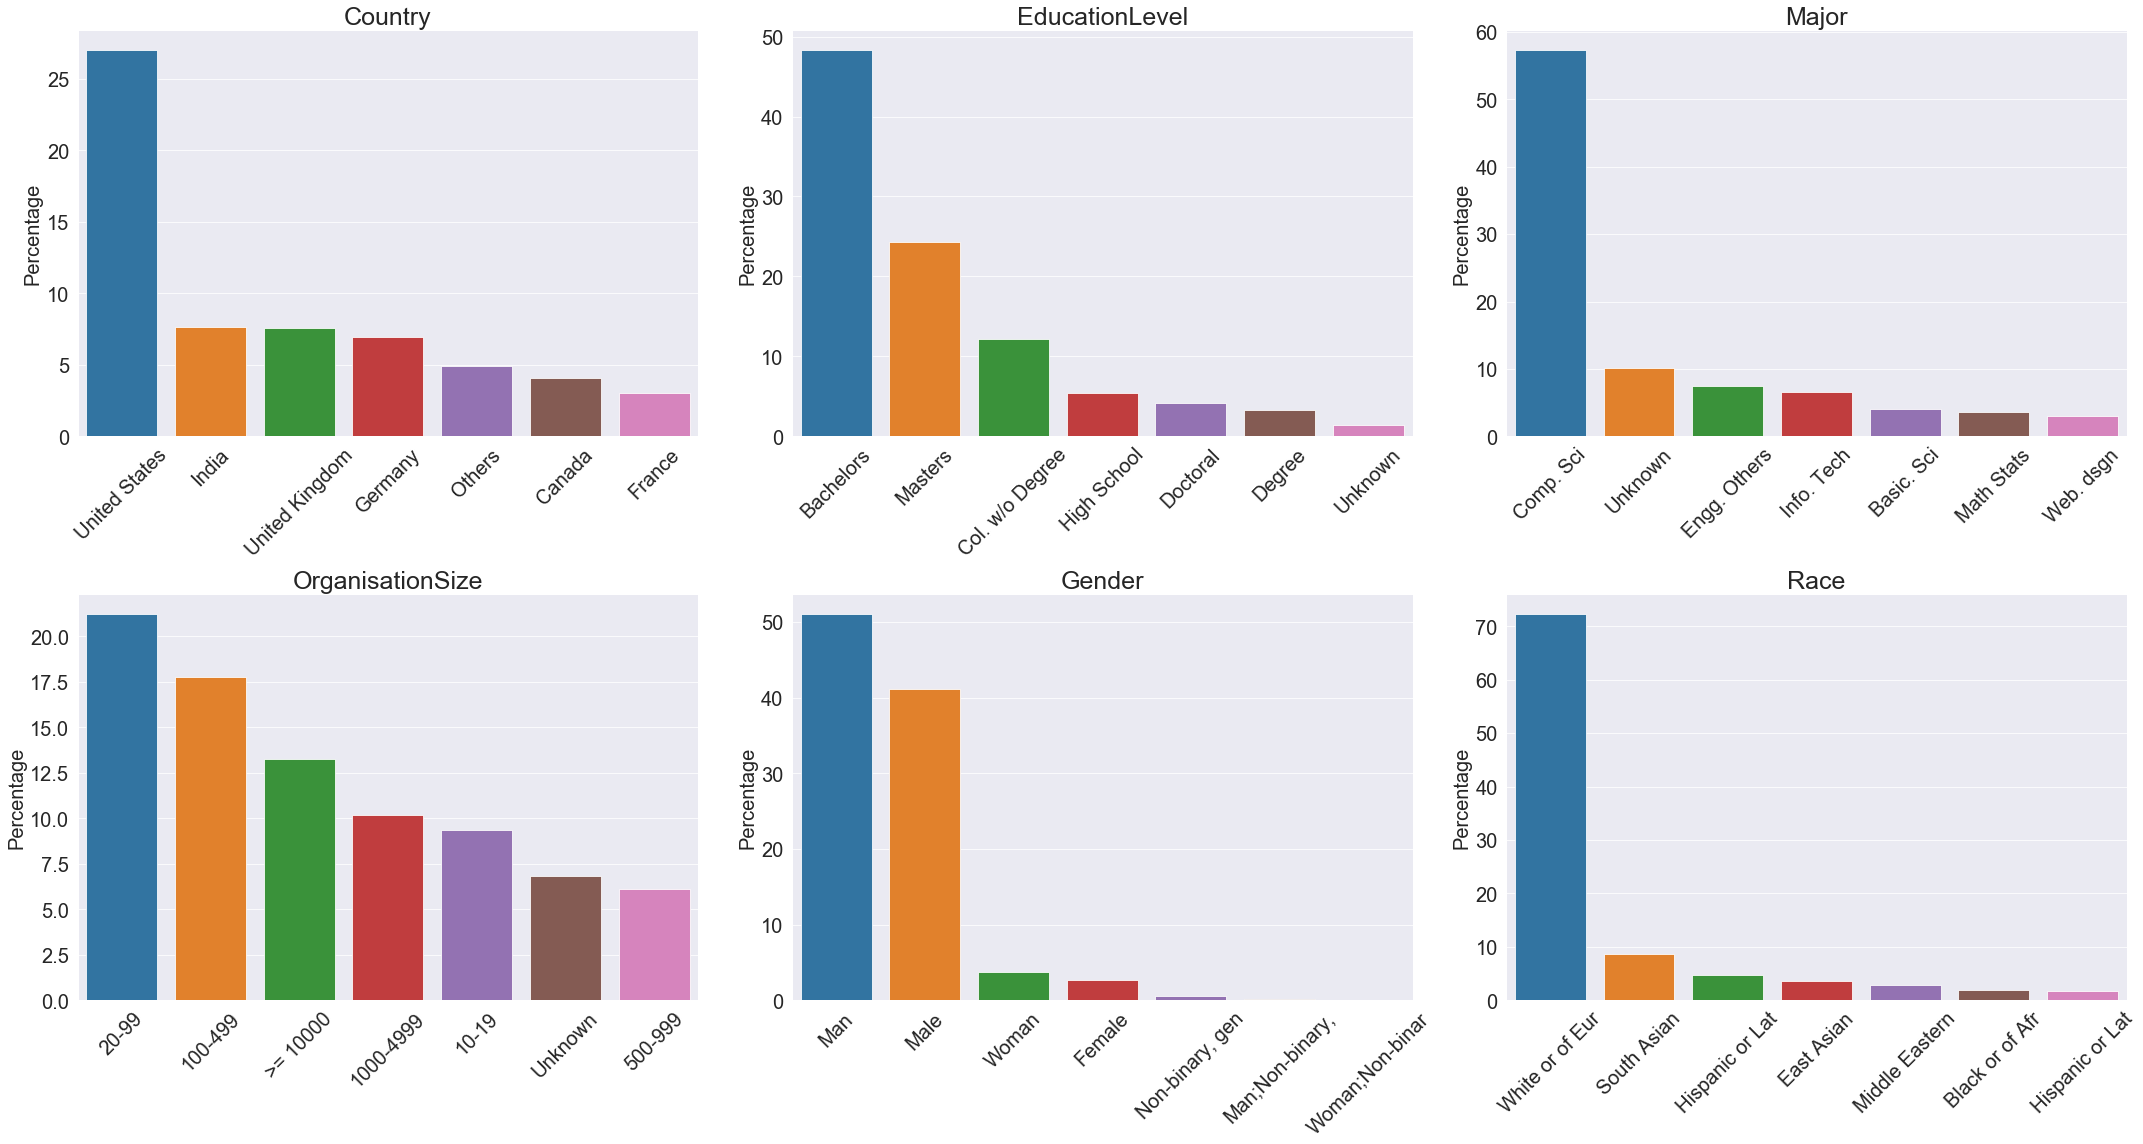

In [66]:
plot_bar_top_n_percentage(combined_survey_df, ['Country', 'EducationLevel', 'Major','OrganisationSize', 'Gender', 'Race'], 7)

#### Observations
* There are very less women developers and the field seems to be dominated by males
* Most of the developers are from United States and of White ethinicity
* Bulk of the developers have Bachelors or Masters from Computer Science

### 4.2 What are the features diffrentiating high earning developers from low earning developers?

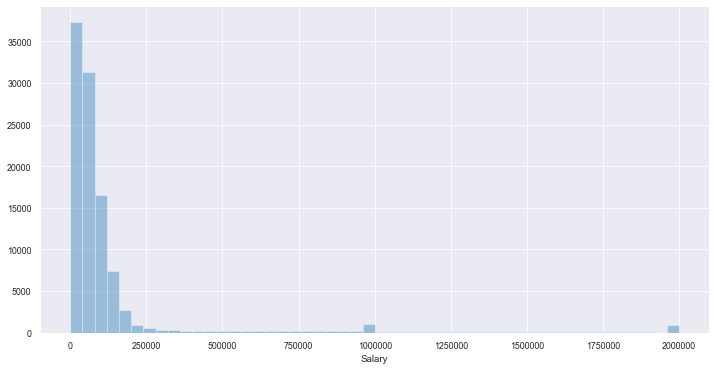

In [67]:
fig = plt.figure(figsize=(12,6))
sns.distplot(combined_survey_df.Salary, kde=False)
plt.show()

Seems we have outliers which are skewing are Salary distribution. Lets remove those records from our analysis.

In [68]:
combined_survey_df = combined_survey_df.loc[combined_survey_df.Salary <= 300000].reset_index(drop=True)

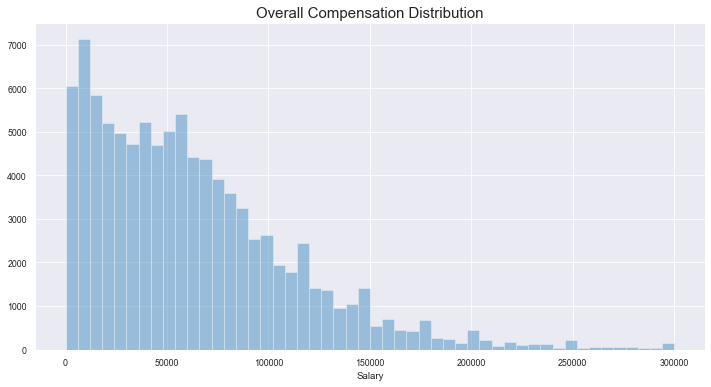

In [69]:
fig = plt.figure(figsize=(12,6))
sns.distplot(combined_survey_df.Salary, kde=False)
plt.title("Overall Compensation Distribution", fontsize=15)
plt.show()

In [70]:
mean = combined_survey_df.Salary.mean()
std  = combined_survey_df.Salary.std()

sd_one_minus = mean - std
sd_one_plus  = mean + std

print("mean  : ", mean)
print("std   : ", std)
print("1 SD -: ", sd_one_minus)
print("1 SD +: ", sd_one_plus)

mean  :  62803.89160831939
std   :  49661.80906373005
1 SD -:  13142.082544589342
1 SD +:  112465.70067204944


Lets see the demographic distribution of developers whoes salary is greater than and less than one standard deviation from the mean

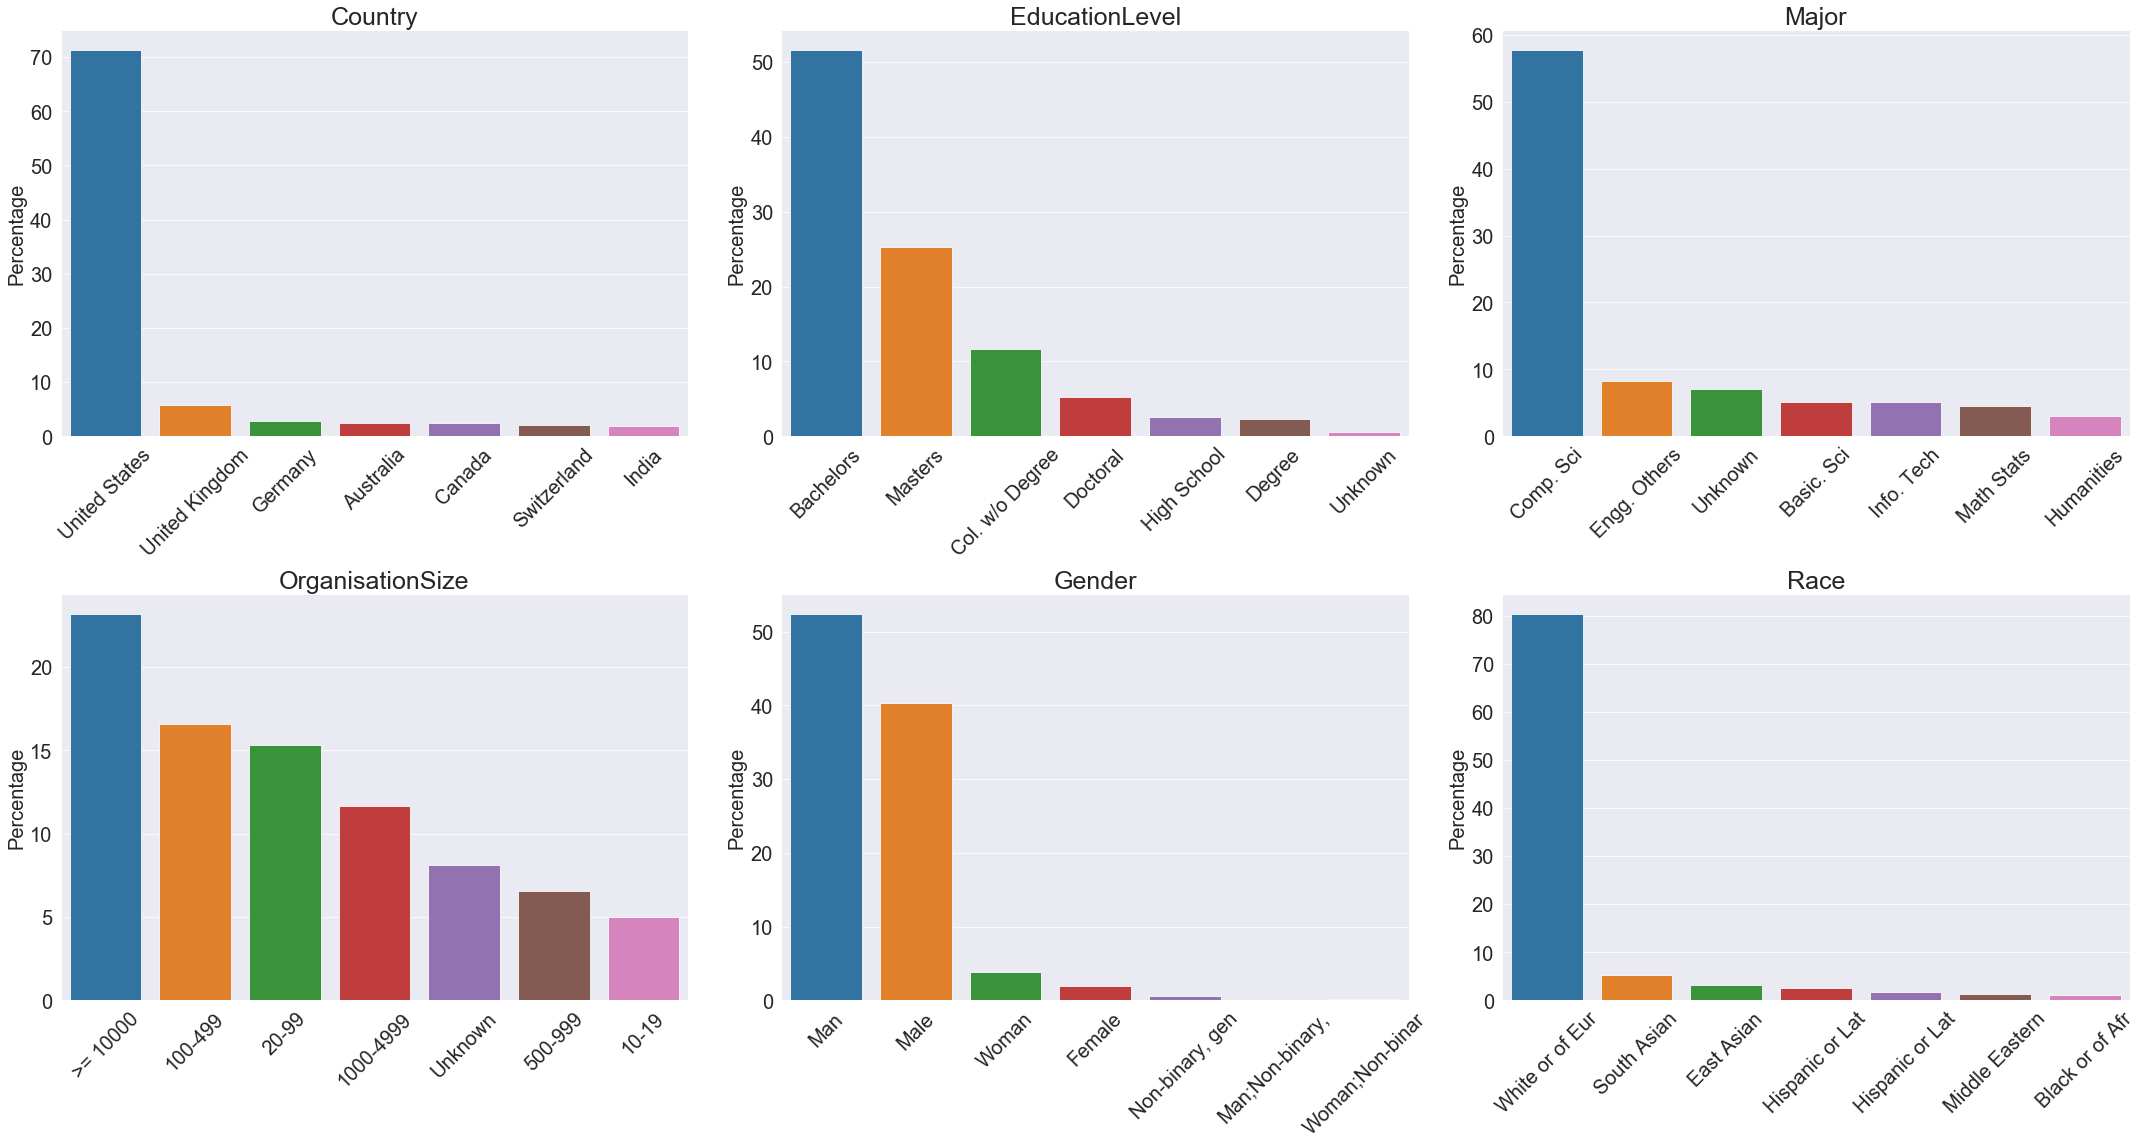

In [71]:
high_earn_dev_group = combined_survey_df.loc[combined_survey_df.Salary > sd_one_plus]
plot_bar_top_n_percentage(high_earn_dev_group, ['Country', 'EducationLevel', 'Major','OrganisationSize', 'Gender', 'Race'], 7)

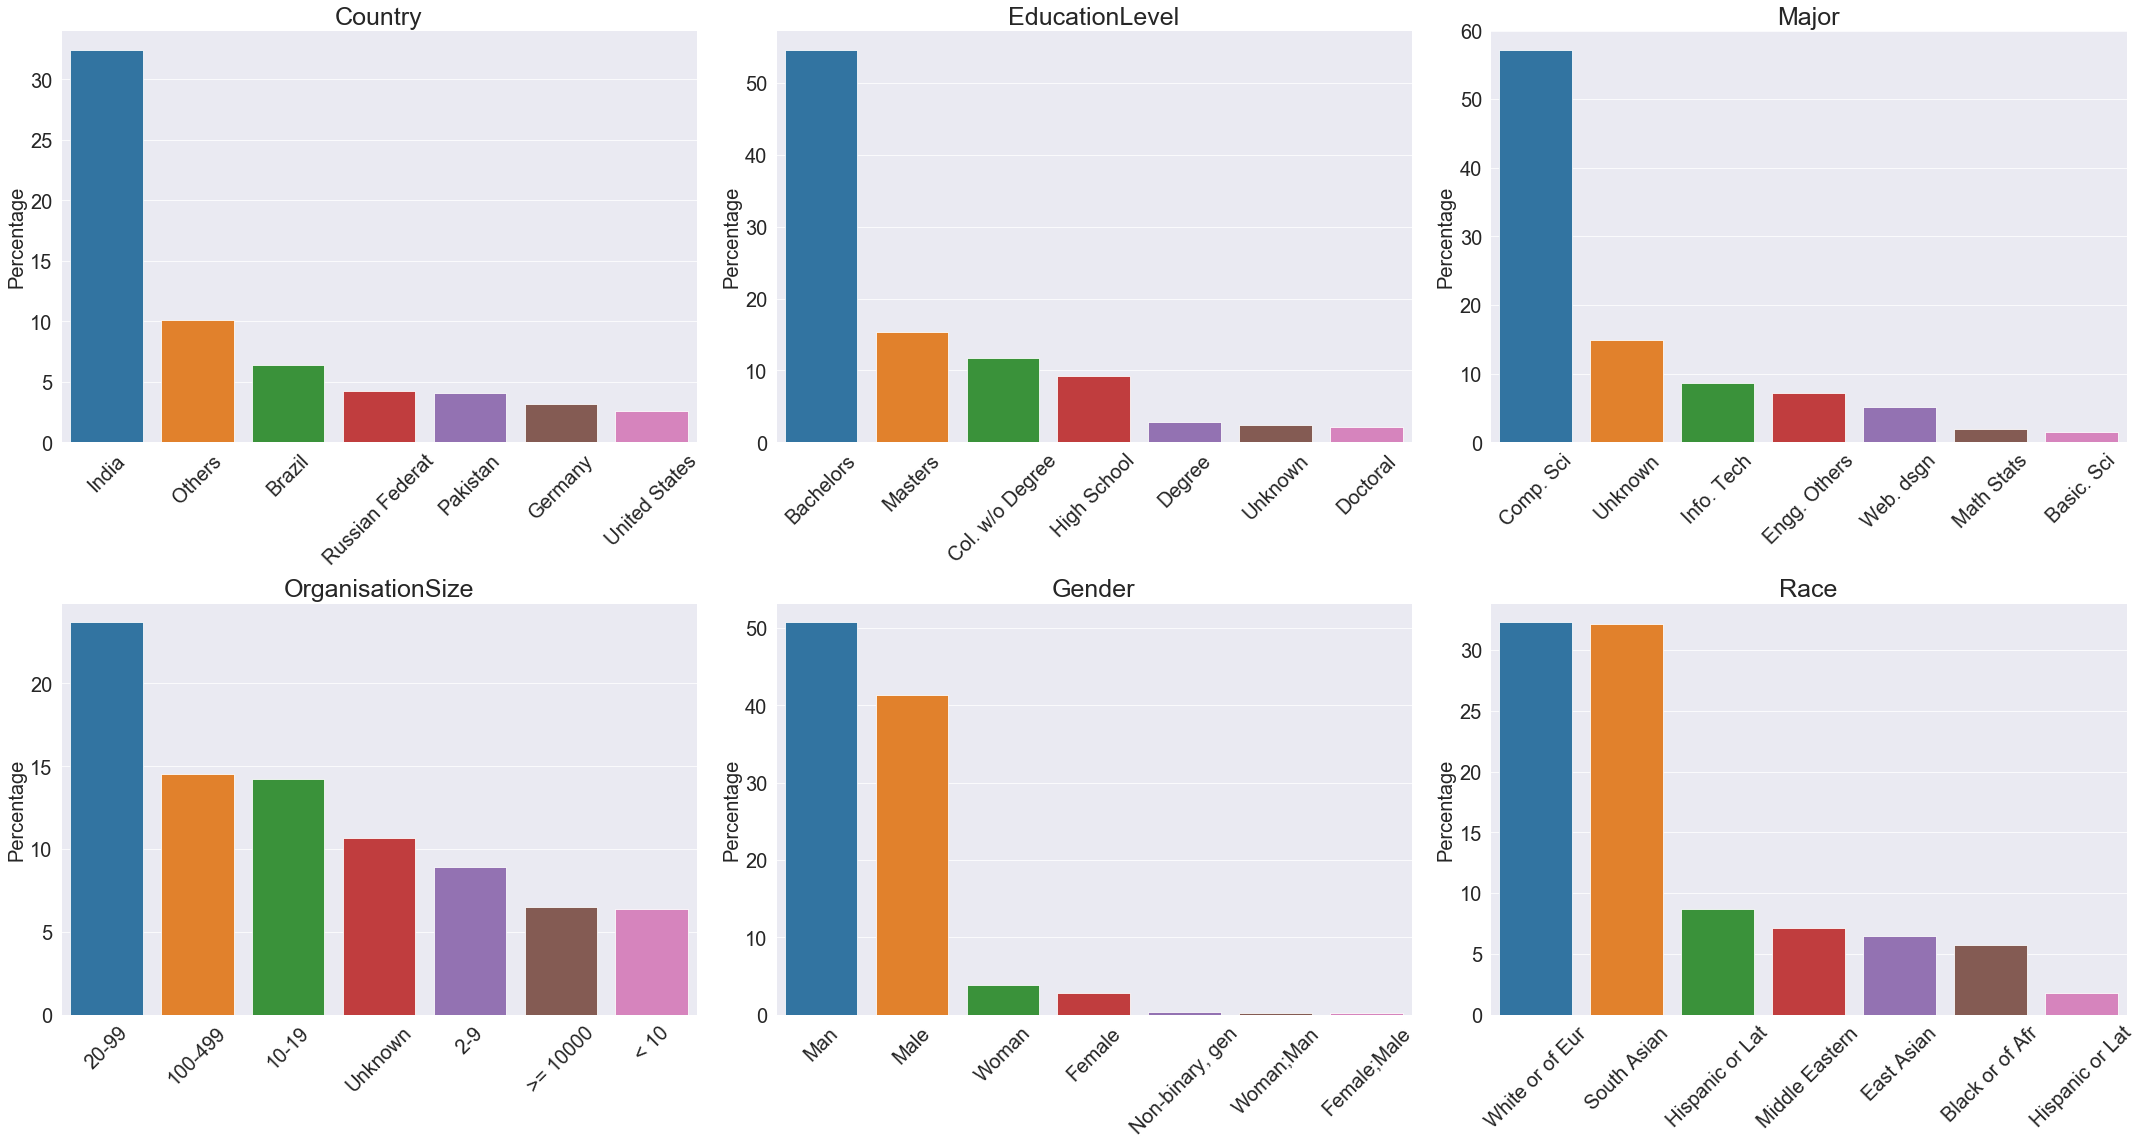

In [72]:
low_earn_dev_group = combined_survey_df.loc[combined_survey_df.Salary < sd_one_minus]
plot_bar_top_n_percentage(low_earn_dev_group, ['Country', 'EducationLevel', 'Major','OrganisationSize', 'Gender', 'Race'], 7)

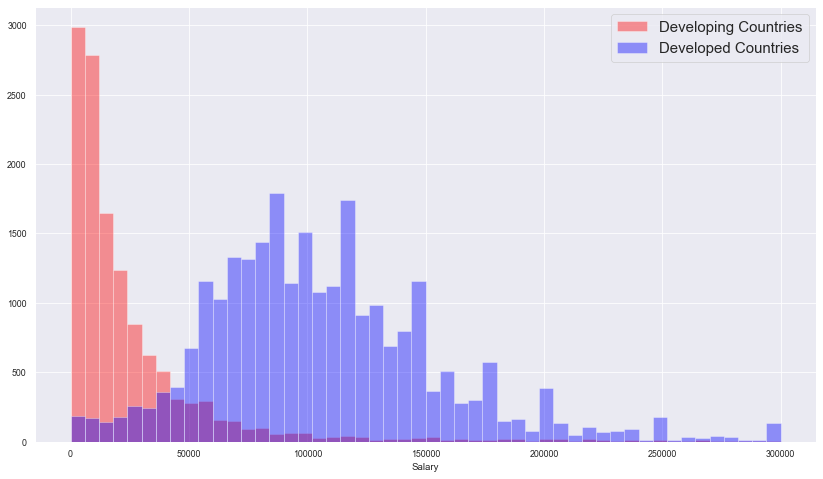

In [73]:
developing_cntry_dev_group = combined_survey_df[(combined_survey_df.Country == 'India') | (combined_survey_df.Country == 'Others')]
developed_cntry_dev_group  = combined_survey_df[(combined_survey_df.Country == 'United States')]
fig = plt.figure(figsize=(14,8))
sns.distplot(developing_cntry_dev_group.Salary, label="Developing Countries", color='red', kde=False)
sns.distplot(developed_cntry_dev_group.Salary, label="Developed Countries", color='blue', kde=False)
plt.legend(fontsize=15)
plt.show()

In [74]:
print("Salary of Developers from Developing Countries: Mean ", developing_cntry_dev_group.Salary.mean(), ": Median ", developing_cntry_dev_group.Salary.median())
print("Salary of Developers from Deveploed Countries : Mean ", developed_cntry_dev_group.Salary.mean(),  ": Median ", developed_cntry_dev_group.Salary.median())

Salary of Developers from Developing Countries: Mean  25668.791019955654 : Median  13830.5
Salary of Developers from Deveploed Countries : Mean  107101.09803768275 : Median  100000.0


#### Observations
* Developers earning high are from developed economies like USA, UK, Germany, Australia, Canada
* Developers earning low are from developing economies like India, Brazil, Russia, etc.
* Most of the high earners are from USA while the bulk of low earners are from India
* The education level and majors for both the developing and developed country developers are similar.
* Bulk of the high earning developers work in large organisations with size more that 10000 while the low earning developers work with smaller organisations with size around 100
* As expected the ethinicity of low earning developers is South Asian as they hail from India. However there is an equal chunk of low earning developers of white and european ethinicity from other developing countries from the west

Lets see the diffrence in technologies for these two groups

In [75]:
def plot_value_counts(value_counts, title):
    fig = plt.figure(figsize=(14,8))
    sns.barplot(y=value_counts.index.values, x=value_counts.values)
    ax = plt.gca()
    ax.yaxis.set_ticks_position('right')
    labels = [label if len(label) < 15 else label[0:14] for label in value_counts.index.values]
    ax.set_yticklabels(labels)
    plt.setp(ax.get_yticklabels(), fontsize=15)
    plt.title(title, fontsize=20)
    plt.show()

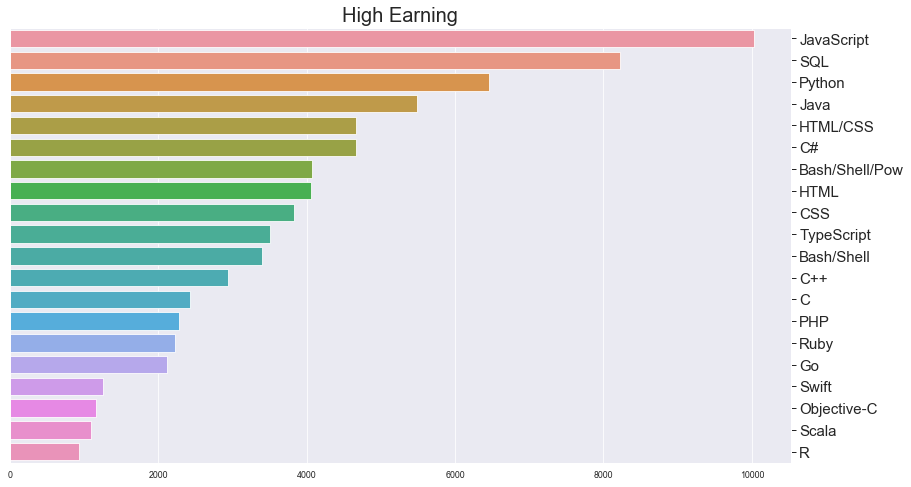

In [76]:
prog_lang_high_earners = extract_value_counts_from_feature(high_earn_dev_group.LanguageExp,";")
plot_value_counts(prog_lang_high_earners.head(20), "High Earning")

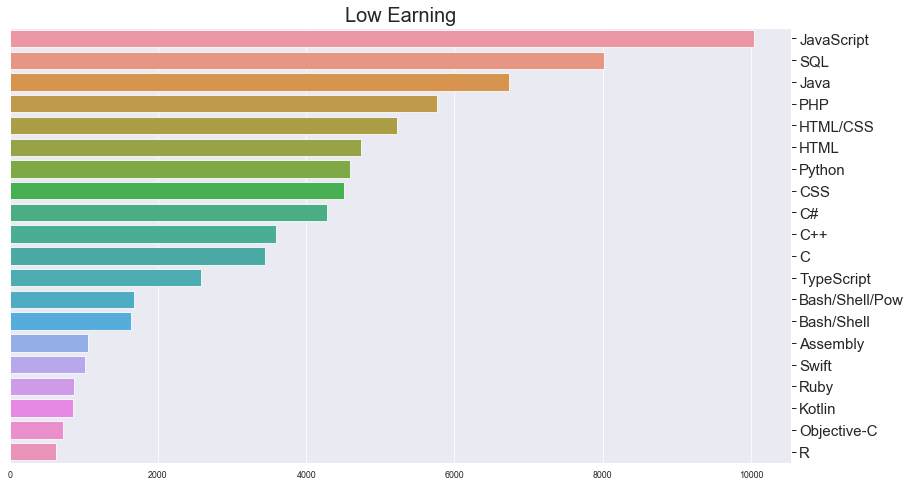

In [77]:
prog_lang_low_earners = extract_value_counts_from_feature(low_earn_dev_group.LanguageExp,";")
plot_value_counts(prog_lang_low_earners.head(20), "Low Earning")

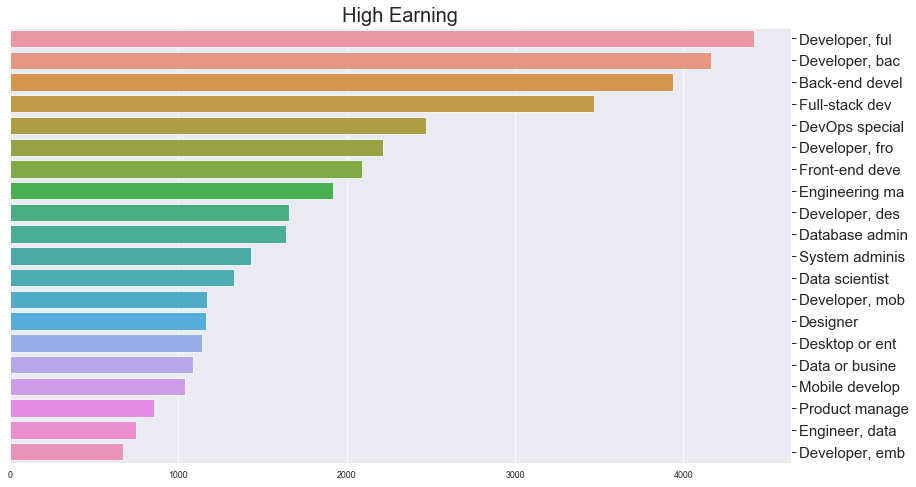

In [78]:
dev_type_high_earners = extract_value_counts_from_feature(high_earn_dev_group.DeveloperType,";")
plot_value_counts(dev_type_high_earners.head(20), "High Earning")

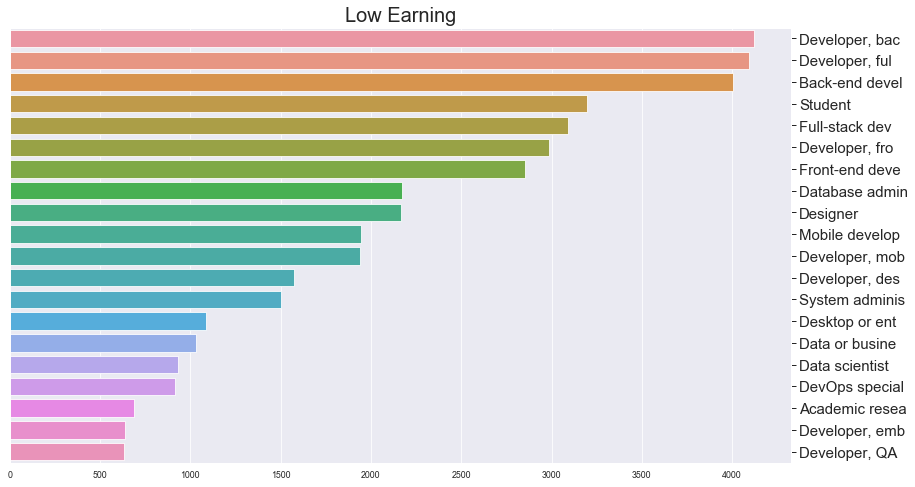

In [79]:
dev_type_low_earners  = extract_value_counts_from_feature(low_earn_dev_group.DeveloperType,";")
plot_value_counts(dev_type_low_earners.head(20), "Low Earning")

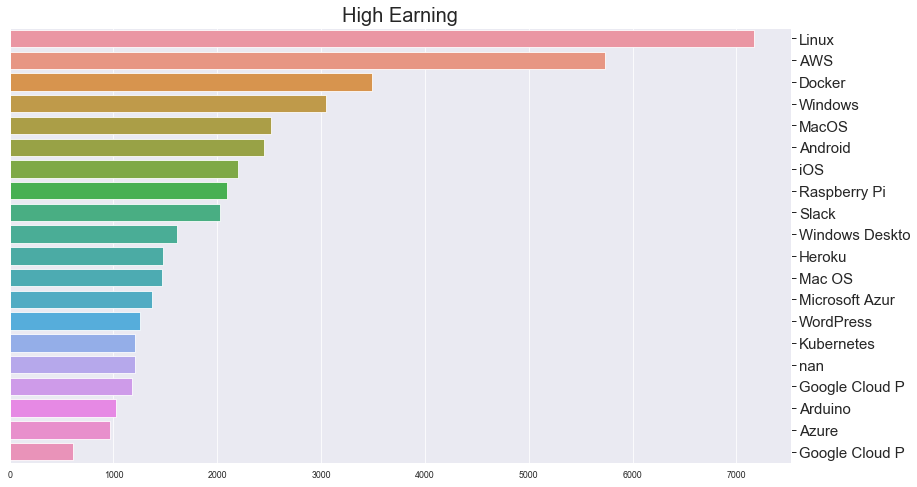

In [80]:
plat_exp_high_earners = extract_value_counts_from_feature(high_earn_dev_group.PlatformExp,";")
plot_value_counts(plat_exp_high_earners.head(20), "High Earning")

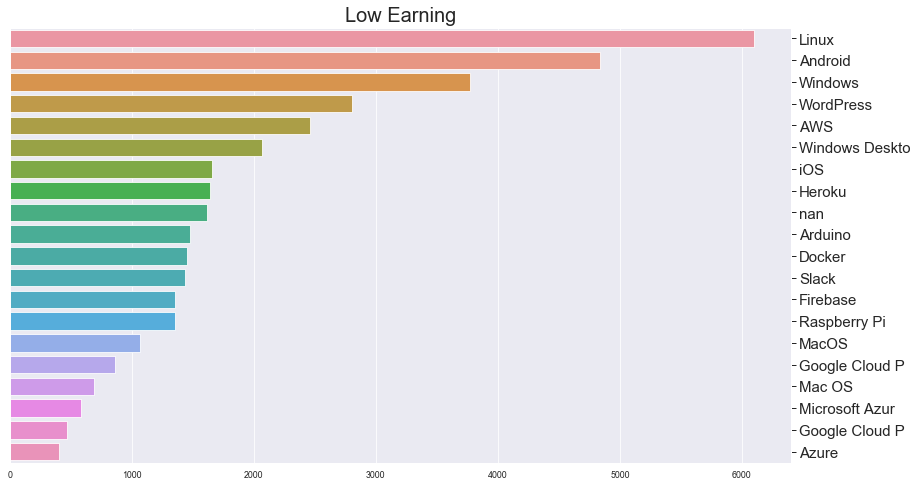

In [81]:
plat_exp_low_earners = extract_value_counts_from_feature(low_earn_dev_group.PlatformExp,";")
plot_value_counts(plat_exp_low_earners.head(20), "Low Earning")

#### Observations
* Both high earning and low earning developers seem to be similar developers working on similar programming language and platform.

### 4.3 What factors contribute towards developer satisfaction?

There are two metrics of satisfaction in the data - Career Satisfaction and Job Satisfaction. Lets analyse them both

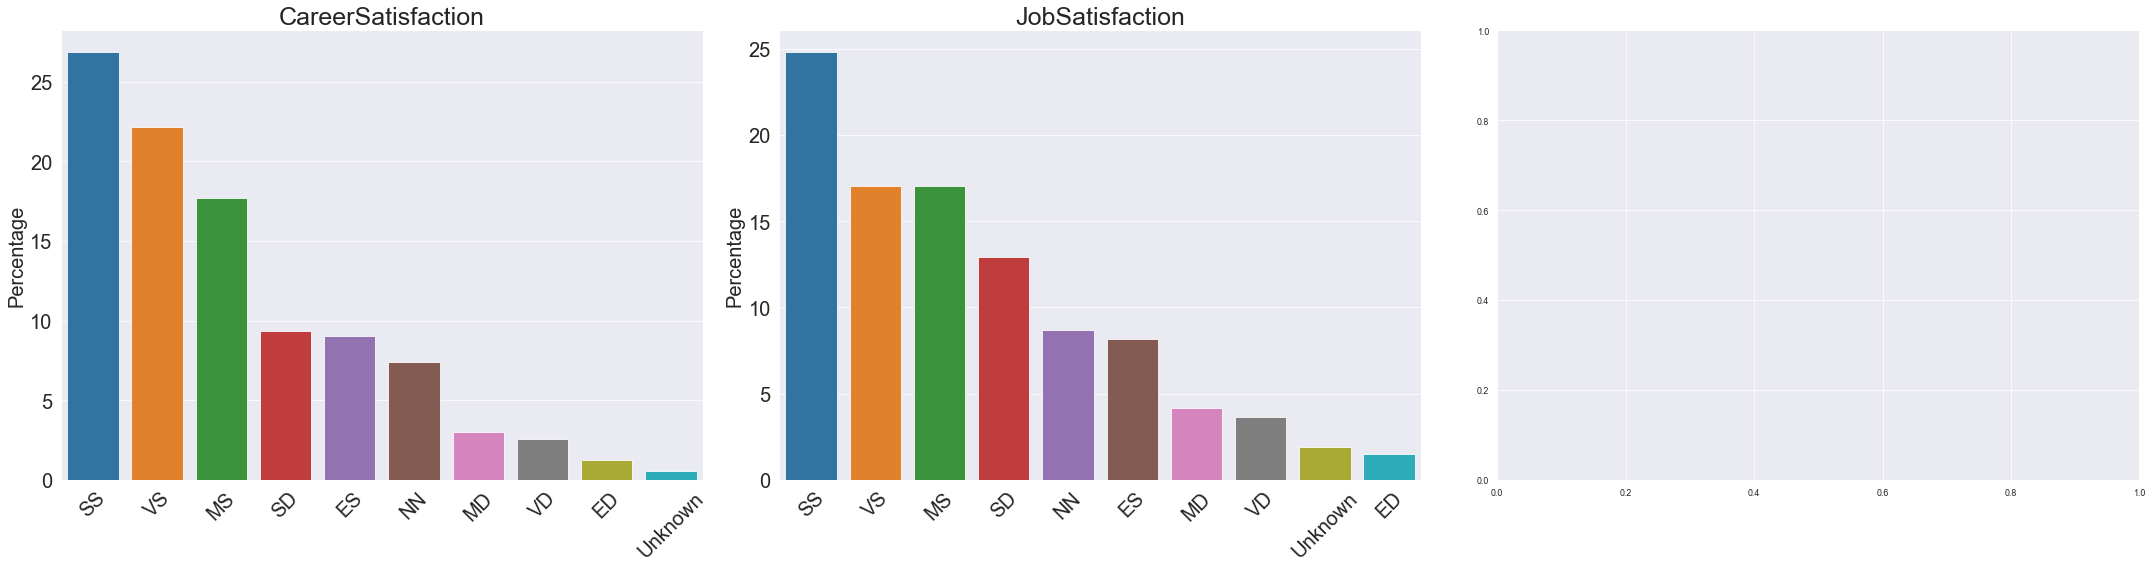

In [82]:
plot_bar_top_n_percentage(combined_survey_df, ['CareerSatisfaction', 'JobSatisfaction'], 10)

Most developers seem to be diffrent levels of "satisfied" while the "dissatisficed" levels are genreally low
* Lets focus on two sub groups of developers - high satisfaction and low satisfaction
* High Satisfaction Group - Extremely Satisfied (ES), Very Satisfied (VS)
* Low Satisfaction Group  - Extremely Dissatisfied (ED), Very Dissatisfied(VD)

Lets look at the general demographics

In [83]:
high_car_sat_dev_group = combined_survey_df.loc[(combined_survey_df.CareerSatisfaction == 'ES') | (combined_survey_df.CareerSatisfaction == 'VS')].reset_index(drop=True)
low_car_sat_dev_group  = combined_survey_df.loc[(combined_survey_df.CareerSatisfaction == 'ED') | (combined_survey_df.CareerSatisfaction == 'VD')].reset_index(drop=True)

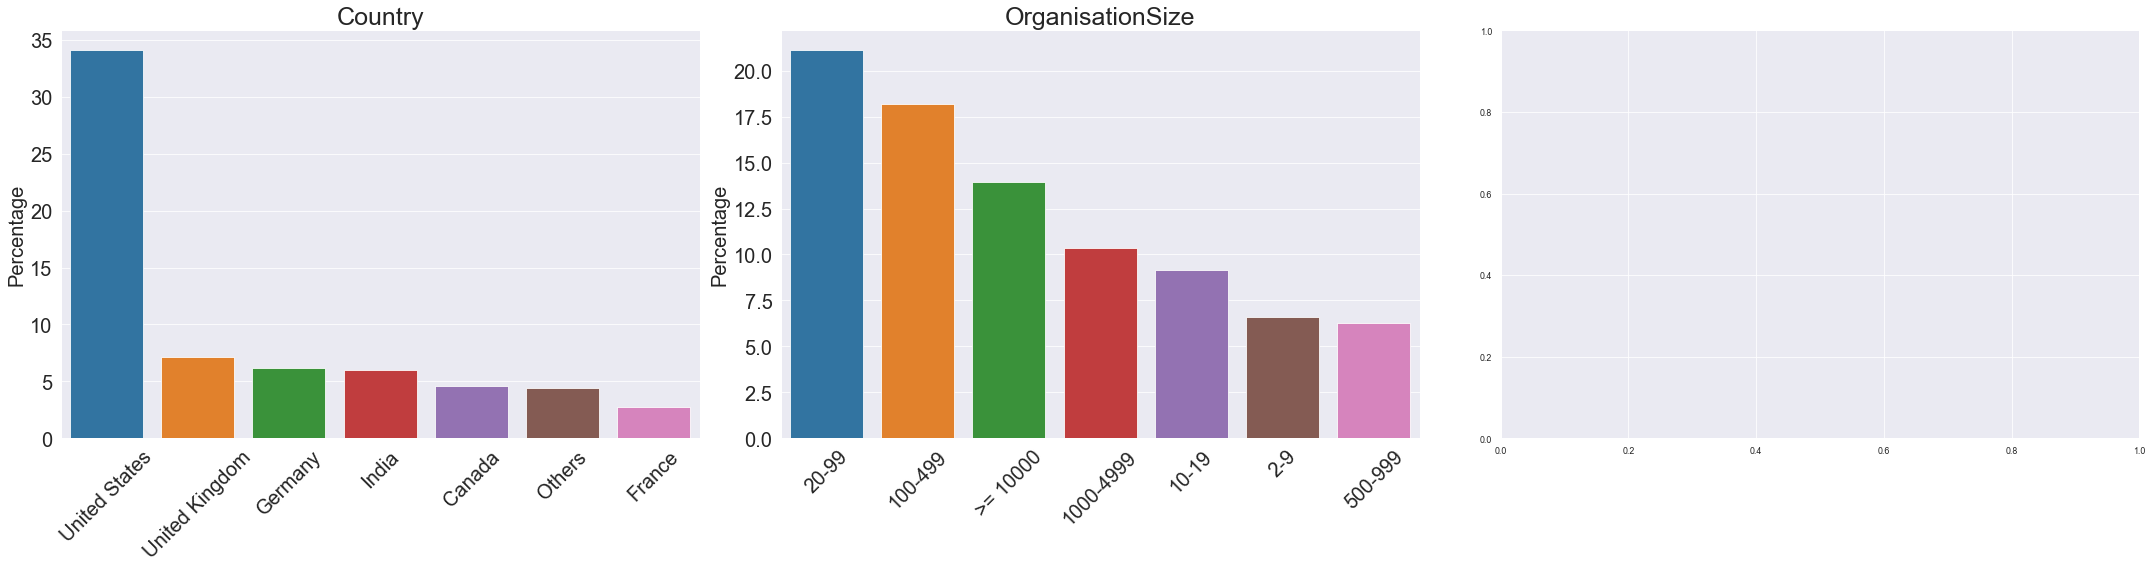

In [84]:
plot_bar_top_n_percentage(high_car_sat_dev_group, ['Country', 'OrganisationSize'], 7)

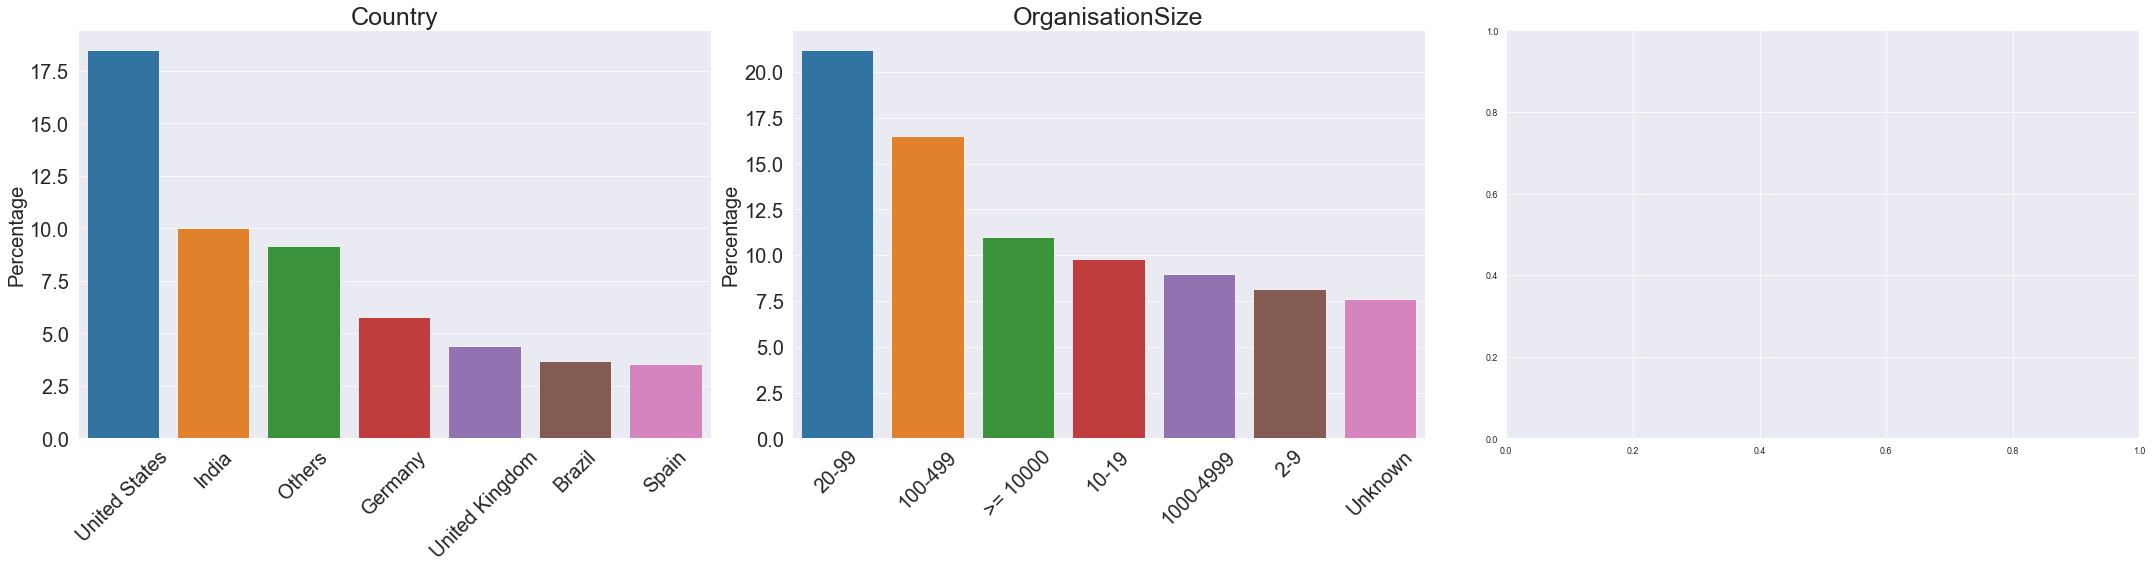

In [85]:
plot_bar_top_n_percentage(low_car_sat_dev_group, ['Country', 'OrganisationSize'], 7)

In [86]:
high_job_sat_dev_group = combined_survey_df.loc[(combined_survey_df.JobSatisfaction == 'ES') | (combined_survey_df.JobSatisfaction == 'VS')].reset_index(drop=True)
low_job_sat_dev_group  = combined_survey_df.loc[(combined_survey_df.JobSatisfaction == 'ED') | (combined_survey_df.JobSatisfaction == 'VD')].reset_index(drop=True)

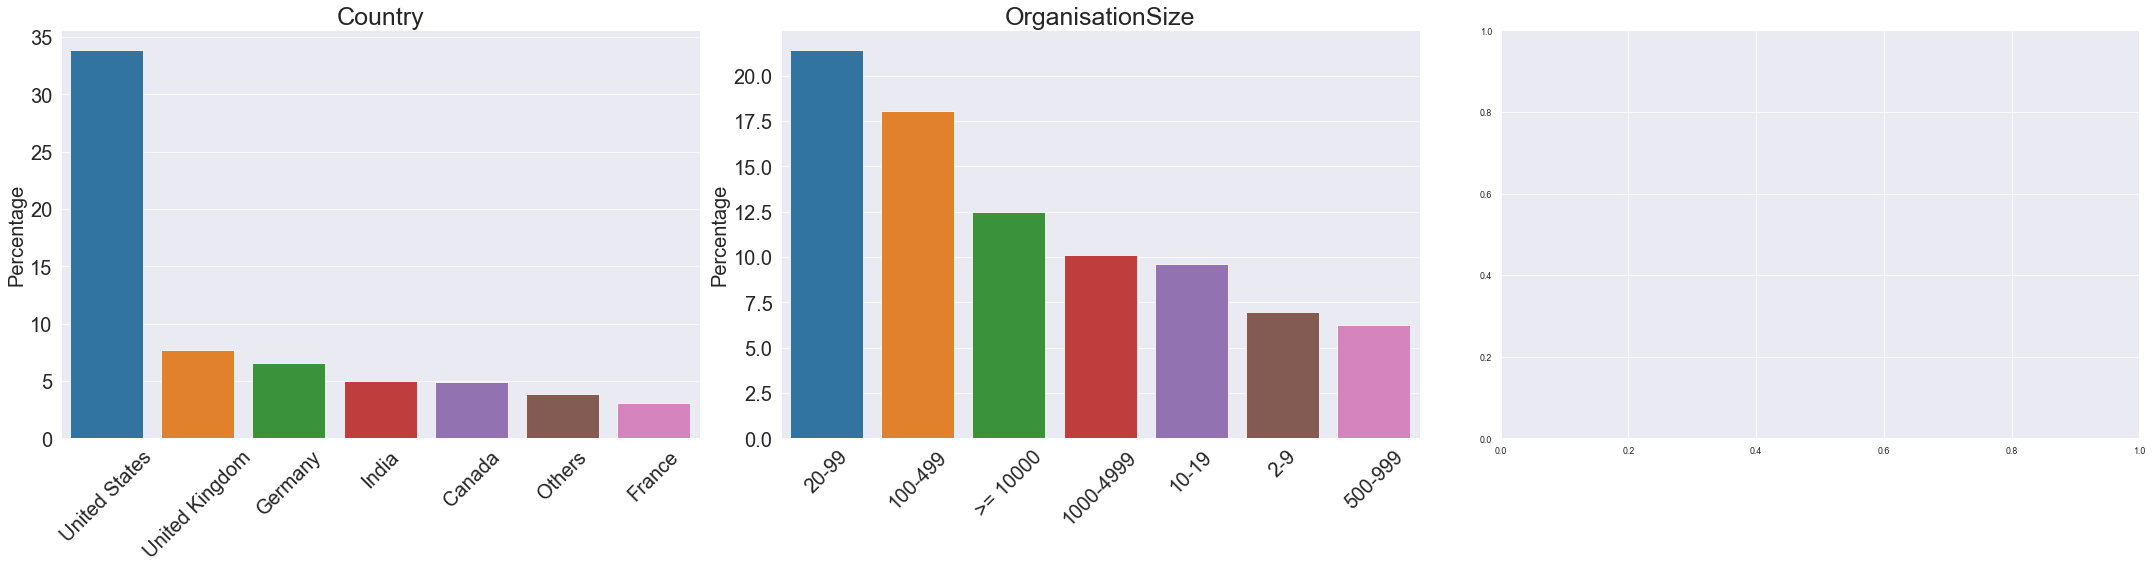

In [87]:
plot_bar_top_n_percentage(high_job_sat_dev_group, ['Country', 'OrganisationSize'], 7)

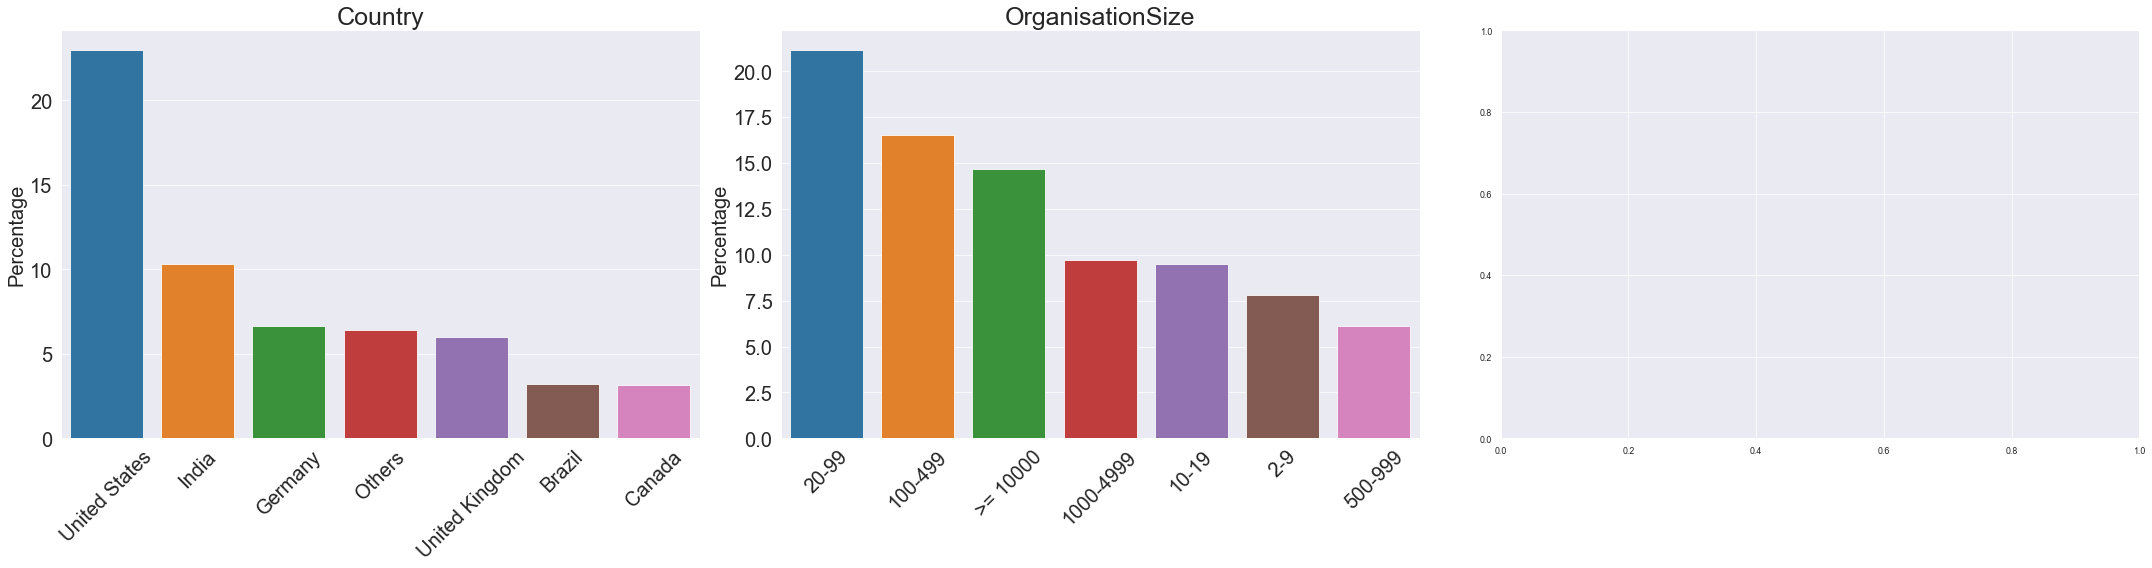

In [88]:
plot_bar_top_n_percentage(low_job_sat_dev_group, ['Country', 'OrganisationSize'], 7)

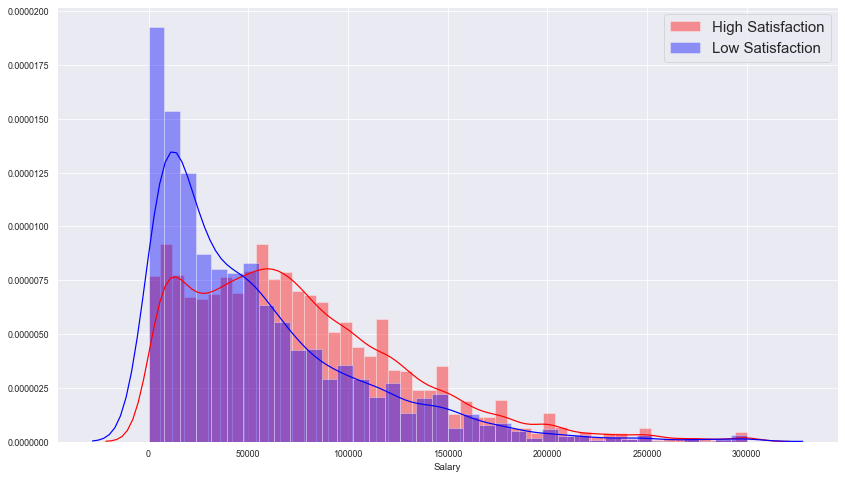

In [89]:
fig = plt.figure(figsize=(14,8))
sns.distplot(high_car_sat_dev_group.Salary, label='High Satisfaction', color='red', norm_hist=False)
sns.distplot(low_car_sat_dev_group.Salary, label='Low Satisfaction', color='blue', norm_hist=False)
plt.legend(fontsize=15)
plt.show()

In [90]:
print("Salary of Satisfied Developers   : Mean ", high_car_sat_dev_group.Salary.mean(), ": Median ", high_car_sat_dev_group.Salary.median())
print("Salary of Dissatisfied Developers: Mean ", low_car_sat_dev_group.Salary.mean(),  ": Median ", low_car_sat_dev_group.Salary.median())

Salary of Satisfied Developers   : Mean  74777.94156768025 : Median  65424.0
Salary of Dissatisfied Developers: Mean  53397.773726541556 : Median  38944.0


* Once again country seems to be the dominant factor for career satisfaction. Satisfactions is generally less among developing country developers
* Career Satisfaction and Job Satisfaction are same
* Salary is another factor that has a clear effect on satisfaction. Developers reporting satisfaction on average earn 20000 Dollars more

# 5 - Conclusion


1. What is the general demographics of developers?  
   Most of the developers are men and from the United States. From the developing world most developers are from India.
2. What are the features differentiating high earning developers from low earning developers?  
   The main factor influencing the earning is Country followed by the Organisation Size. Developers working with big organisations tend to earn higher.
3. What factors contribute towards developer satisfaction?  
   Salary and compensation followed by Country (Which is again linked to Salary) seem to be the most important factor for jon and career satisfaction. Satisfied developers earn 20000 Dollars more on average than Dissatisfied developers